# Example 2: several species of particles with a zigzag fiber

In [1]:
import config as cfg
from json_dump import make_json_file

For this example I put the whole parameter generation part in the program.

In [2]:
import numpy as np
from json_dump import *
import contact_utils as cu

### Key parameter: how we will name this run
run_name = "02_zigzag"

### Define model parameters

model_params = {}

In [3]:
# ---------- LATTICE OPTIONS ----------

# Options:
# "chain", "square", "triangular", "cubic", "bcc", "fcc"
model_params["lattice_name"] = "triangular"

# Lattice dimensions
model_params["lx"] = 10
model_params["ly"] = 10  # Has to be 1 for chain
model_params["lz"] = 1  # Has to be 1 for square & triangular

In [4]:
# ---------- MODEL PARAMETERS ----------

# Number of particle types
model_params["n_types"] = 2

# Number of particles of each type
model_params["n_particles"] = [10, 10]

## Most important cell: generating the 2-species coupling matrix

In [5]:
cmap_wrapper = cu.ContactMapWrapper.triangular(model_params["n_types"], init_energy=0.0)

# Syntax: [face1, type1, face2, type2]
cmap_wrapper[0, 0, 2, 1] = -100
cmap_wrapper[4, 0, 0, 1] = -100

model_params["couplings"] = cmap_wrapper.get_formatted_couplings()

# Initialization option
model_params["initialize_option"] = "random"

# If "initialize_option" is set to "from_file", we must specify the location of
# the input file
# model_params["state_input"] = str(cfg.structures_path/"final_structure.dat")

In [6]:
# Options for average collection
from pathlib import Path
data_path = Path("./data")

model_params["state_av_option"] = True
model_params["e_av_option"] = True
model_params["e_record_option"] = False

if model_params["state_av_option"]:
    state_path = data_path/run_name/"average_state"
    state_path.mkdir(parents = True, exist_ok = True)
    model_params["state_av_output"] =  str(state_path.resolve()) + "/"

if model_params["e_av_option"]:
    energy_path = data_path/run_name/"energy_moment"
    energy_path.mkdir(parents = True, exist_ok = True)
    model_params["e_av_output"] = str(energy_path.resolve())  + "/"

In [7]:
# Pick the probabilities of different moves
# Options:
""""
    "swap_empty_full",
    "swap_full_full",
    "rotate",
    "mutate",
    "rotate_and_swap_w_empty"
"""

moves_dict = {}
moves_dict["swap_empty_full"] = 1/4
moves_dict["rotate"] = 1/4
moves_dict["rotate_and_swap_w_empty"] = 1/4
moves_dict["swap_full_full"] = 1/4

model_params["move_probas"] = moves_dict

print(cfg.input_path)
make_json_file(model_params, cfg.input_path/"model_params.json")

/Users/vincent/research/projects/23_frustratedSelfAssembly/camemberts3D/simulations/250121_cubicCamembertsElegant_test/frusa_lattice_mc/input


In [8]:
### Define mc parameters

mc_params = {}

# Number of MC steps used for equilibration
mc_params["mcs_eq"] = 2000

# Number of MC steps used for averaging
mc_params["mcs_av"] = 10

# Type of cooling schedule
# if exponential chosen: specify log10(T) as initial and final temperatures
mc_params["cooling_schedule"] = "exponential"

# Initial annealing temperature
mc_params["Ti"] = np.log10(20)

# Final annealing temperature
mc_params["Tf"] = 0

# Number of annealing steps
mc_params["Nt"] = 10

# Option to collect state checkpoints at the end of each temperature cycle
mc_params["checkpoint_option"] = True

# If checkpoint is True, we need to provide the output address for the 
# checkpoint files
structures_path = data_path/run_name/"structures"
structures_path.mkdir(parents = True, exist_ok = True)

if mc_params["checkpoint_option"]:
    mc_params["checkpoint_address"] = str(structures_path.resolve())+"/"

# Output location of the final state configuration (must end with "/")
mc_params["final_structure_address"] = str(structures_path.resolve())+"/"

make_json_file(mc_params, cfg.input_path/"mc_params.json")

In [9]:
from time import process_time

In [10]:
# Run the simulation

t0 = process_time()
cfg.run_simulation(overwrite = True)
t1 = process_time()

At least one of the output folders is already populated!
overwrite flag set to True: running anyway.
Program runs!
Got here100
Printing current system state
Number of particle types: 2
Number of particles of each type: {10, 10, }
Printing interactions structure
Printing coupling matrix: {0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, }
System energy is: -100
All mc parameters loaded successfully
---------------------------------------------
      Monte-Carlo simulation parameters
---------------------------------------------

Number of equilibration steps mcs_eq = 2000
Number of averaging steps m

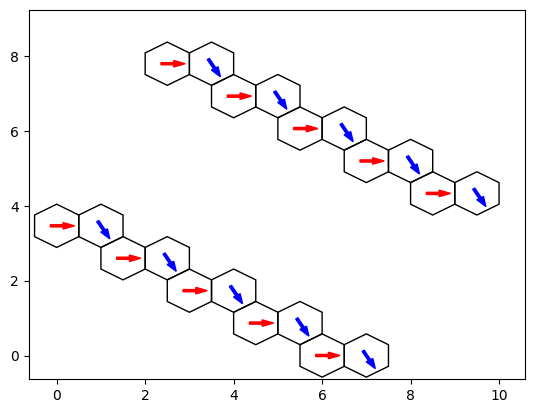

In [11]:
import matplotlib.pyplot as plt
import plotting.plot_tri as pt

pr = pt.ParticleRepresentation.from_model_file(cfg.default_model_params_file)
fig, ax = pr.plot_results_arrows(results_folder=structures_path, squared = True)
fig.savefig("figures/test_fiber_1spec.svg")

In [12]:
time_elapsed = t1 - t0
time_elapsed

0.010241000000000167